# Handwritten Recognition
Before coding, go over two things:
1. How does the structure of the NN appear from images
1. How does this NN learn (gradient descent)

## Loading the Dataset
Pytorch has the MNIST dataset for use that we will just fetch.

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


# Load MNIST dataset
# Explain what each parameter is doing!
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', transform=transform, train=True, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

## Visualizing the Dataset

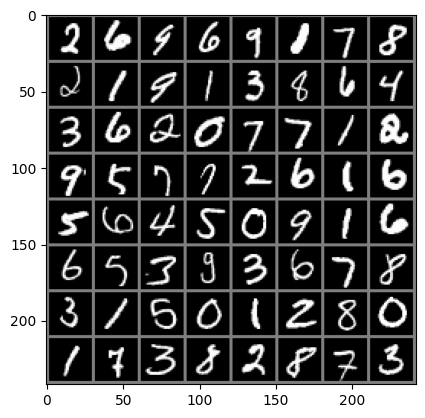

In [18]:
# Function to show images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize if you've applied normalization
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))


## Define a simple model

In [19]:
class SimpleNN(nn.Module):
    def __init__(self, input_size=28*28, num_classes=10):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc(x)
        return x

## Set up hyperparams and optimize!

In [20]:
learning_rate = 0.001
num_epochs = 10

# Initialize the model, loss, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    total_loss = 0
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}')

print('Training finished.')

# Save the trained model
torch.save(model.state_dict(), 'simple_nn_model.pth')

Epoch [1/10], Loss: 0.4701
Epoch [2/10], Loss: 0.3263
Epoch [3/10], Loss: 0.3084
Epoch [4/10], Loss: 0.3009
Epoch [5/10], Loss: 0.2946
Epoch [6/10], Loss: 0.2915
Epoch [7/10], Loss: 0.2892
Epoch [8/10], Loss: 0.2828
Epoch [9/10], Loss: 0.2820
Epoch [10/10], Loss: 0.2790
Training finished.


## How did we do?

In [27]:
# Load the test dataset
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Function to calculate accuracy
def get_accuracy(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return (correct / total) * 100

# Test the model
test_accuracy = get_accuracy(model, test_loader)
print(f'Test Accuracy: {test_accuracy:.2f}%')


Test Accuracy: 91.75%


Actual Label: 7
Predicted Label: 7


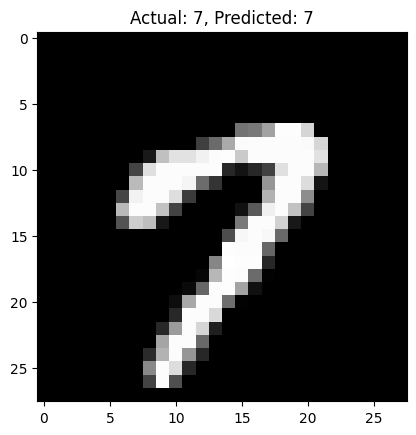

In [26]:
def predict_image(image):
    with torch.no_grad():
        image = image.view(1, -1)  # Flatten the image and make it a batch of size 1
        output = model(image)
        _, predicted = torch.max(output, 1)
        return predicted.item()

# Choose an image from the test dataset
image, label = train_dataset[15]  # Change this index to test different images

# Make a prediction
predicted_label = predict_image(image)

# Display the actual and predicted labels
print(f'Actual Label: {label}')
print(f'Predicted Label: {predicted_label}')

# Display the image
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Actual: {label}, Predicted: {predicted_label}')
plt.show()
